In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

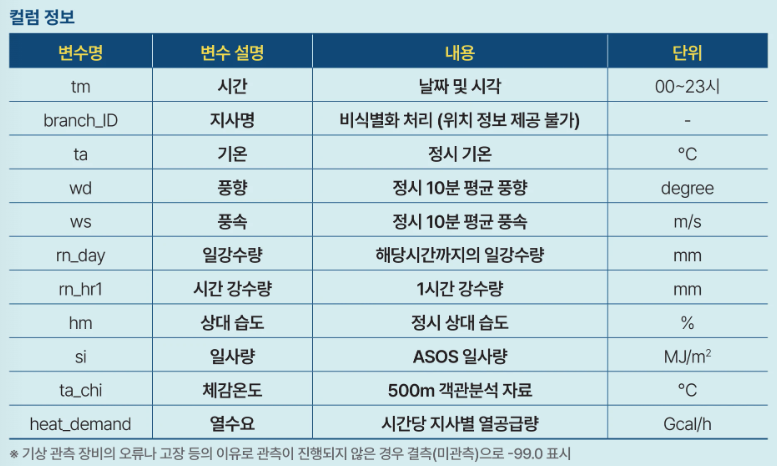

In [2]:
df = pd.read_csv('dataset/train_heat.csv')
df

Unnamed: 0  train_heat.tm train_heat.branch_id  train_heat.ta  \
0                1     2021010101                    A          -10.1   
1                2     2021010102                    A          -10.2   
2                3     2021010103                    A          -10.0   
3                4     2021010104                    A           -9.3   
4                5     2021010105                    A           -9.0   
...            ...            ...                  ...            ...   
499296      499297     2023123119                    S            3.2   
499297      499298     2023123120                    S            2.9   
499298      499299     2023123121                    S            2.1   
499299      499300     2023123122                    S            2.2   
499300      499301     2023123123                    S            1.2   

        train_heat.wd  train_heat.ws  train_heat.rn_day  train_heat.rn_hr1  \
0                78.3            0.5                0.0                0.0   
1                71.9            0.6                0.0                0.0   
2               360.0            0.0                0.0                0.0   
3               155.9            0.5                0.0                0.0   
4                74.3            1.9                0.0                0.0   
...               ...            ...                ...                ...   
499296          233.5            0.4                2.5                0.0   
499297          227.4            0.1                2.5                0.0   
499298          360.0            0.0                2.5                0.0   
499299           30.0            1.4                2.5                0.0   
499300          359.0            0.8                2.5                0.0   

        train_heat.hm  train_heat.si  train_heat.ta_chi  \
0                68.2          -99.0               -8.2   
1                69.9          -99.0               -8.6   
2                69.2          -99.0               -8.8   
3                65.0          -99.0               -8.9   
4                63.5          -99.0               -9.2   
...               ...            ...                ...   
499296           91.5          -99.0                2.8   
499297           92.1          -99.0                2.7   
499298           93.3          -99.0                1.4   
499299           95.5          -99.0                1.3   
499300           94.9          -99.0                0.6   

        train_heat.heat_demand  
0                          281  
1                          262  
2                          266  
3                          285  
4                          283  
...                        ...  
499296                      34  
499297                      35  
499298                      35  
499299                      40  
499300                      33  

[499301 rows x 12 columns]

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df

train_heat.tm train_heat.branch_id  train_heat.ta  train_heat.wd  \
0          2021010101                    A          -10.1           78.3   
1          2021010102                    A          -10.2           71.9   
2          2021010103                    A          -10.0          360.0   
3          2021010104                    A           -9.3          155.9   
4          2021010105                    A           -9.0           74.3   
...               ...                  ...            ...            ...   
499296     2023123119                    S            3.2          233.5   
499297     2023123120                    S            2.9          227.4   
499298     2023123121                    S            2.1          360.0   
499299     2023123122                    S            2.2           30.0   
499300     2023123123                    S            1.2          359.0   

        train_heat.ws  train_heat.rn_day  train_heat.rn_hr1  train_heat.hm  \
0                 0.5                0.0                0.0           68.2   
1                 0.6                0.0                0.0           69.9   
2                 0.0                0.0                0.0           69.2   
3                 0.5                0.0                0.0           65.0   
4                 1.9                0.0                0.0           63.5   
...               ...                ...                ...            ...   
499296            0.4                2.5                0.0           91.5   
499297            0.1                2.5                0.0           92.1   
499298            0.0                2.5                0.0           93.3   
499299            1.4                2.5                0.0           95.5   
499300            0.8                2.5                0.0           94.9   

        train_heat.si  train_heat.ta_chi  train_heat.heat_demand  
0               -99.0               -8.2                     281  
1               -99.0               -8.6                     262  
2               -99.0               -8.8                     266  
3               -99.0               -8.9                     285  
4               -99.0               -9.2                     283  
...               ...                ...                     ...  
499296          -99.0                2.8                      34  
499297          -99.0                2.7                      35  
499298          -99.0                1.4                      35  
499299          -99.0                1.3                      40  
499300          -99.0                0.6                      33  

[499301 rows x 11 columns]

In [4]:
df.columns = [col.replace('train_heat.','') for col in df.columns]
print(df.columns)
df

Index(['tm', 'branch_id', 'ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si',
       'ta_chi', 'heat_demand'],
      dtype='object')


tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm    si  \
0       2021010101         A -10.1   78.3  0.5     0.0     0.0  68.2 -99.0   
1       2021010102         A -10.2   71.9  0.6     0.0     0.0  69.9 -99.0   
2       2021010103         A -10.0  360.0  0.0     0.0     0.0  69.2 -99.0   
3       2021010104         A  -9.3  155.9  0.5     0.0     0.0  65.0 -99.0   
4       2021010105         A  -9.0   74.3  1.9     0.0     0.0  63.5 -99.0   
...            ...       ...   ...    ...  ...     ...     ...   ...   ...   
499296  2023123119         S   3.2  233.5  0.4     2.5     0.0  91.5 -99.0   
499297  2023123120         S   2.9  227.4  0.1     2.5     0.0  92.1 -99.0   
499298  2023123121         S   2.1  360.0  0.0     2.5     0.0  93.3 -99.0   
499299  2023123122         S   2.2   30.0  1.4     2.5     0.0  95.5 -99.0   
499300  2023123123         S   1.2  359.0  0.8     2.5     0.0  94.9 -99.0   

        ta_chi  heat_demand  
0         -8.2          281  
1         -8.6          262  
2         -8.8          266  
3         -8.9          285  
4         -9.2          283  
...        ...          ...  
499296     2.8           34  
499297     2.7           35  
499298     1.4           35  
499299     1.3           40  
499300     0.6           33  

[499301 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  int64  
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 41.9+ MB


In [6]:
df['tm'] = pd.to_datetime(df['tm'], format='%Y%m%d%H')
df = df.sort_values(['branch_id', 'tm'])
df

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

          si  ta_chi  heat_demand  
0      -99.0    -8.2          281  
1      -99.0    -8.6          262  
2      -99.0    -8.8          266  
3      -99.0    -8.9          285  
4      -99.0    -9.2          283  
...      ...     ...          ...  
499296 -99.0     2.8           34  
499297 -99.0     2.7           35  
499298 -99.0     1.4           35  
499299 -99.0     1.3           40  
499300 -99.0     0.6           33  

[499301 rows x 11 columns]

In [7]:
df_nan = df.replace(-99.0, np.nan)
df_nan

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        si  ta_chi  heat_demand  
0      NaN    -8.2        281.0  
1      NaN    -8.6        262.0  
2      NaN    -8.8        266.0  
3      NaN    -8.9        285.0  
4      NaN    -9.2        283.0  
...     ..     ...          ...  
499296 NaN     2.8         34.0  
499297 NaN     2.7         35.0  
499298 NaN     1.4         35.0  
499299 NaN     1.3         40.0  
499300 NaN     0.6         33.0  

[499301 rows x 11 columns]

In [8]:
df_nan.isnull().sum()

tm                  0
branch_id           0
ta              12997
wd              18815
ws              18815
rn_day          18626
rn_hr1          19154
hm              39717
si             232922
ta_chi             20
heat_demand        23
dtype: int64

In [9]:
nan_ratio = df_nan.isnull().mean()
nan_ratio.sort_values(ascending=False)

si             0.466496
hm             0.079545
rn_hr1         0.038362
wd             0.037683
ws             0.037683
rn_day         0.037304
ta             0.026030
heat_demand    0.000046
ta_chi         0.000040
tm             0.000000
branch_id      0.000000
dtype: float64

In [10]:
df_select = df_nan.copy()
df_select.drop(columns='si', inplace=True)
df_select

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        ta_chi  heat_demand  
0         -8.2        281.0  
1         -8.6        262.0  
2         -8.8        266.0  
3         -8.9        285.0  
4         -9.2        283.0  
...        ...          ...  
499296     2.8         34.0  
499297     2.7         35.0  
499298     1.4         35.0  
499299     1.3         40.0  
499300     0.6         33.0  

[499301 rows x 10 columns]

In [11]:
df_select = df_select.set_index('tm')
df_select

branch_id    ta     wd   ws  rn_day  rn_hr1    hm  ta_chi  \
tm                                                                              
2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2    -8.2   
2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9    -8.6   
2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2    -8.8   
2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0    -8.9   
2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5    -9.2   
...                       ...   ...    ...  ...     ...     ...   ...     ...   
2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5     2.8   
2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1     2.7   
2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3     1.4   
2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5     1.3   
2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9     0.6   

                     heat_demand  
tm                                
2021-01-01 01:00:00        281.0  
2021-01-01 02:00:00        262.0  
2021-01-01 03:00:00        266.0  
2021-01-01 04:00:00        285.0  
2021-01-01 05:00:00        283.0  
...                          ...  
2023-12-31 19:00:00         34.0  
2023-12-31 20:00:00         35.0  
2023-12-31 21:00:00         35.0  
2023-12-31 22:00:00         40.0  
2023-12-31 23:00:00         33.0  

[499301 rows x 9 columns]

In [12]:
df_interp = df_select.groupby('branch_id').apply(lambda g: g.interpolate(method='time'))
display(df_interp)

df_interp.reset_index(inplace=True)
display(df_interp)

branch_id    ta     wd   ws  rn_day  rn_hr1    hm  ta_chi  \
tm                                                                              
2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2    -8.2   
2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9    -8.6   
2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2    -8.8   
2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0    -8.9   
2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5    -9.2   
...                       ...   ...    ...  ...     ...     ...   ...     ...   
2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5     2.8   
2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1     2.7   
2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3     1.4   
2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5     1.3   
2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9     0.6   

                     heat_demand  
tm                                
2021-01-01 01:00:00        281.0  
2021-01-01 02:00:00        262.0  
2021-01-01 03:00:00        266.0  
2021-01-01 04:00:00        285.0  
2021-01-01 05:00:00        283.0  
...                          ...  
2023-12-31 19:00:00         34.0  
2023-12-31 20:00:00         35.0  
2023-12-31 21:00:00         35.0  
2023-12-31 22:00:00         40.0  
2023-12-31 23:00:00         33.0  

[499301 rows x 9 columns]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        ta_chi  heat_demand  
0         -8.2        281.0  
1         -8.6        262.0  
2         -8.8        266.0  
3         -8.9        285.0  
4         -9.2        283.0  
...        ...          ...  
499296     2.8         34.0  
499297     2.7         35.0  
499298     1.4         35.0  
499299     1.3         40.0  
499300     0.6         33.0  

[499301 rows x 10 columns]

In [13]:
df_interp.isnull().sum()

tm                 0
branch_id          0
ta                 0
wd                 0
ws                 0
rn_day             0
rn_hr1             0
hm             23165
ta_chi             0
heat_demand        0
dtype: int64

In [14]:
df_interp_hmw = df_interp.copy()

df_interp_hmw['hour'] = df_interp_hmw['tm'].dt.hour
df_interp_hmw['month'] = df_interp_hmw['tm'].dt.month
df_interp_hmw['weekday'] = df_interp_hmw['tm'].dt.weekday

df_interp_hmw

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        ta_chi  heat_demand  hour  month  weekday  
0         -8.2        281.0     1      1        4  
1         -8.6        262.0     2      1        4  
2         -8.8        266.0     3      1        4  
3         -8.9        285.0     4      1        4  
4         -9.2        283.0     5      1        4  
...        ...          ...   ...    ...      ...  
499296     2.8         34.0    19     12        6  
499297     2.7         35.0    20     12        6  
499298     1.4         35.0    21     12        6  
499299     1.3         40.0    22     12        6  
499300     0.6         33.0    23     12        6  

[499301 rows x 13 columns]

In [15]:
df_interp_hmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tm           499301 non-null  datetime64[ns]
 1   branch_id    499301 non-null  object        
 2   ta           499301 non-null  float64       
 3   wd           499301 non-null  float64       
 4   ws           499301 non-null  float64       
 5   rn_day       499301 non-null  float64       
 6   rn_hr1       499301 non-null  float64       
 7   hm           476136 non-null  float64       
 8   ta_chi       499301 non-null  float64       
 9   heat_demand  499301 non-null  float64       
 10  hour         499301 non-null  int64         
 11  month        499301 non-null  int64         
 12  weekday      499301 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 49.5+ MB


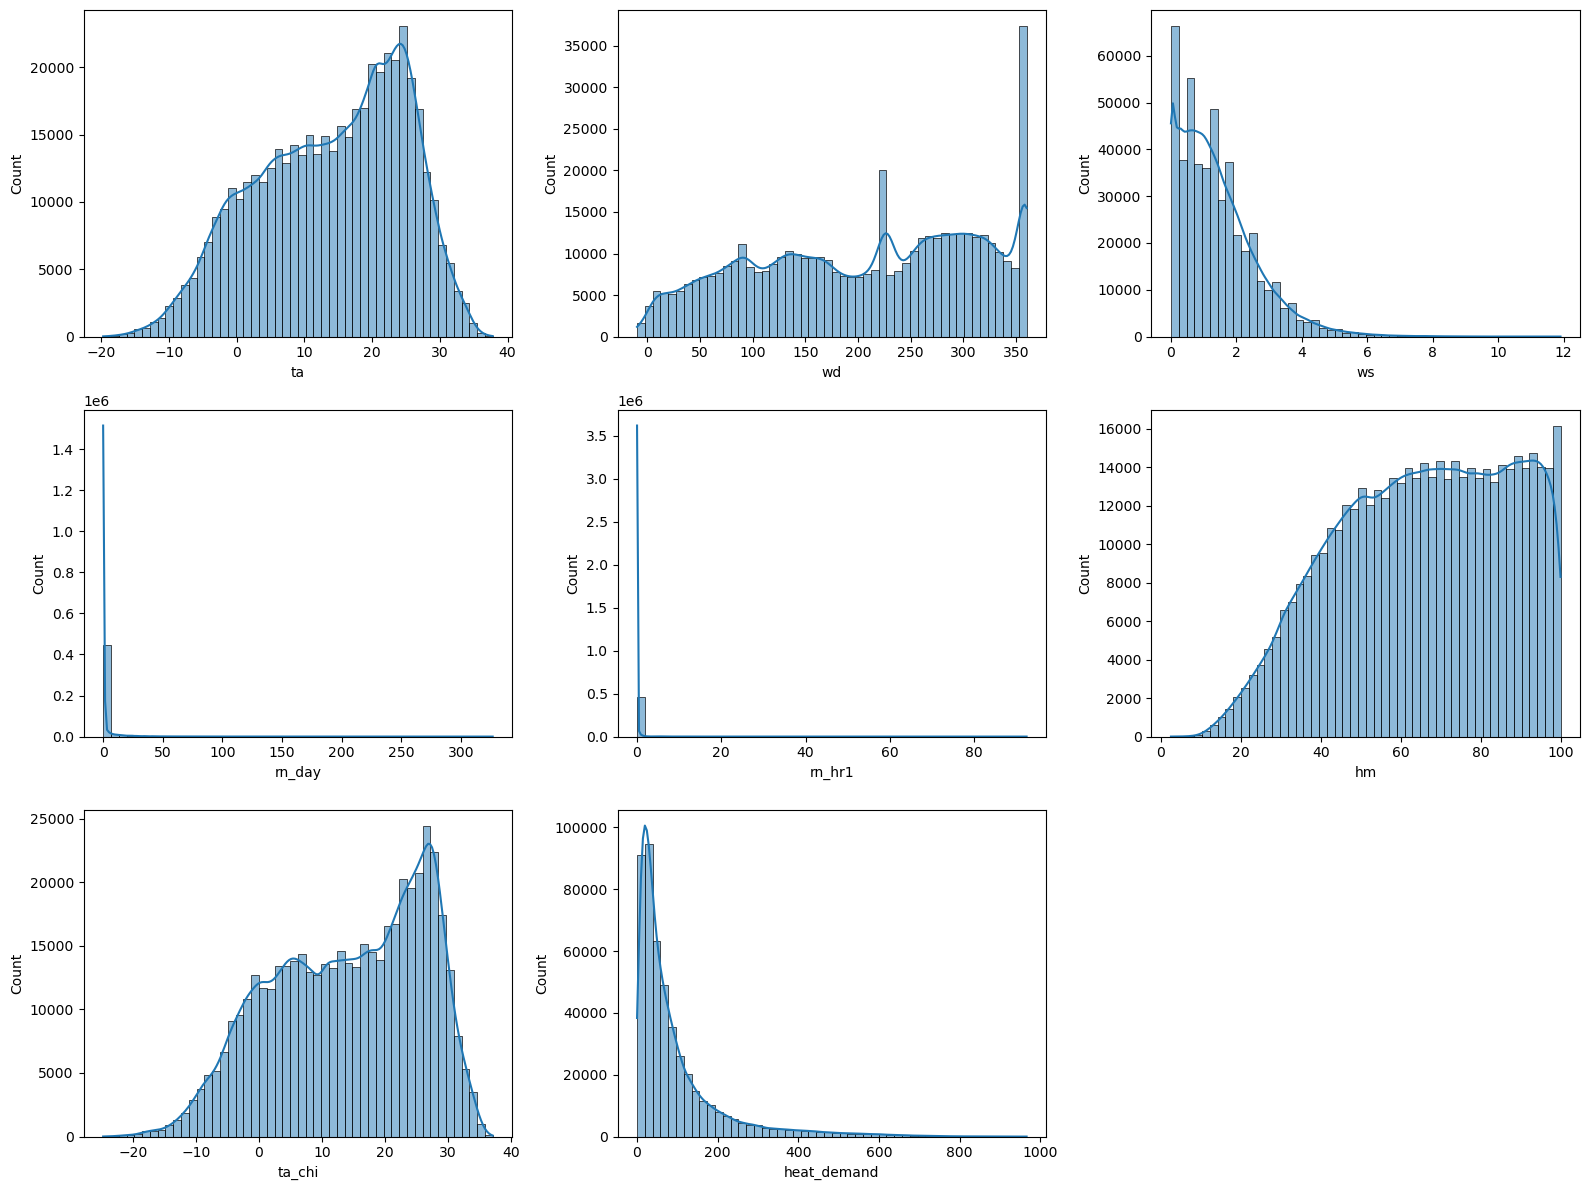

In [16]:
df_drop = df_interp.copy()
df_drop.dropna(inplace=True)

numeric_cols = df_drop.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_drop[col], kde=True, bins=50)
plt.tight_layout()
plt.show()

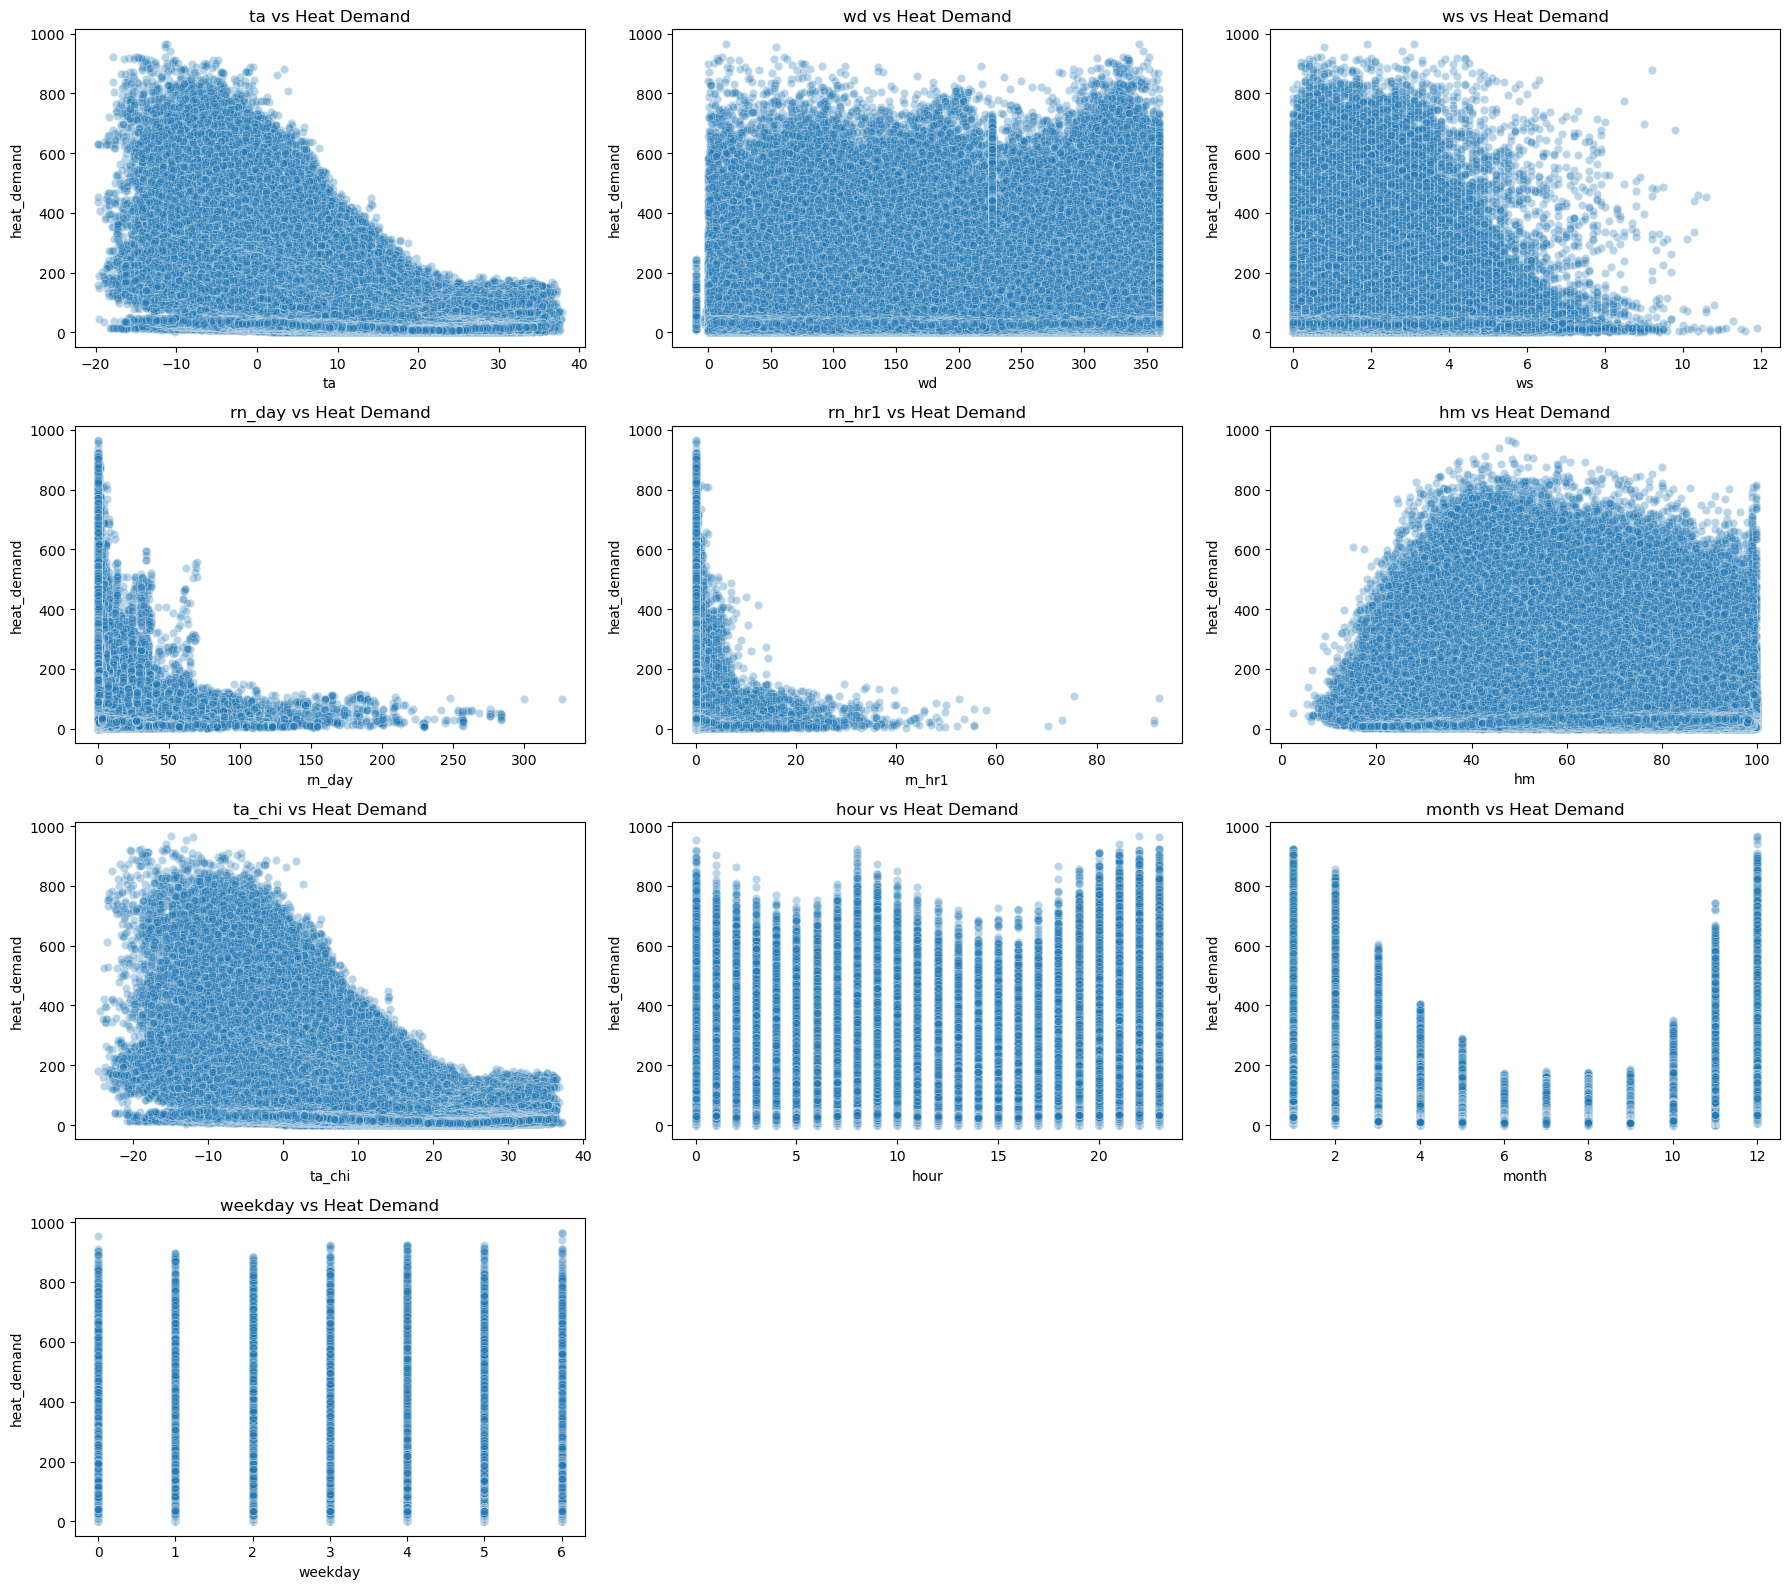

In [17]:
# heat_demand 제외한 수치형 변수만 가져오기
numeric_cols = df_interp_hmw.select_dtypes(include='number').columns
features = [col for col in numeric_cols if col != 'heat_demand']

# 산점도 그리기
plt.figure(figsize=(18, 16))
for i, col in enumerate(features, 1):
    plt.subplot((len(features) + 2) // 3, 3, i)  # 자동 행 수 계산
    sns.scatterplot(data=df_interp_hmw, x=col, y='heat_demand', alpha=0.3)
    plt.title(f'{col} vs Heat Demand')

plt.tight_layout()
plt.show()

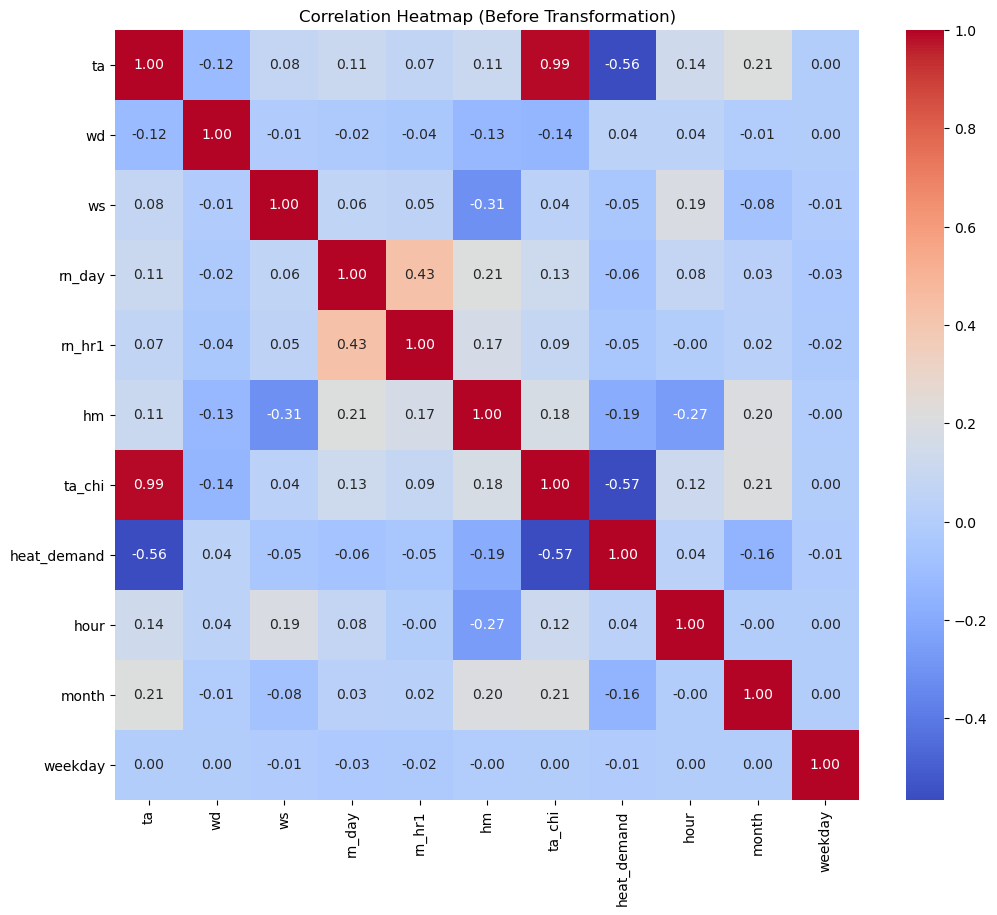

In [18]:
numeric_cols = df_interp_hmw.select_dtypes(include='number').columns
corr_matrix = df_interp_hmw[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Before Transformation)")
plt.show()

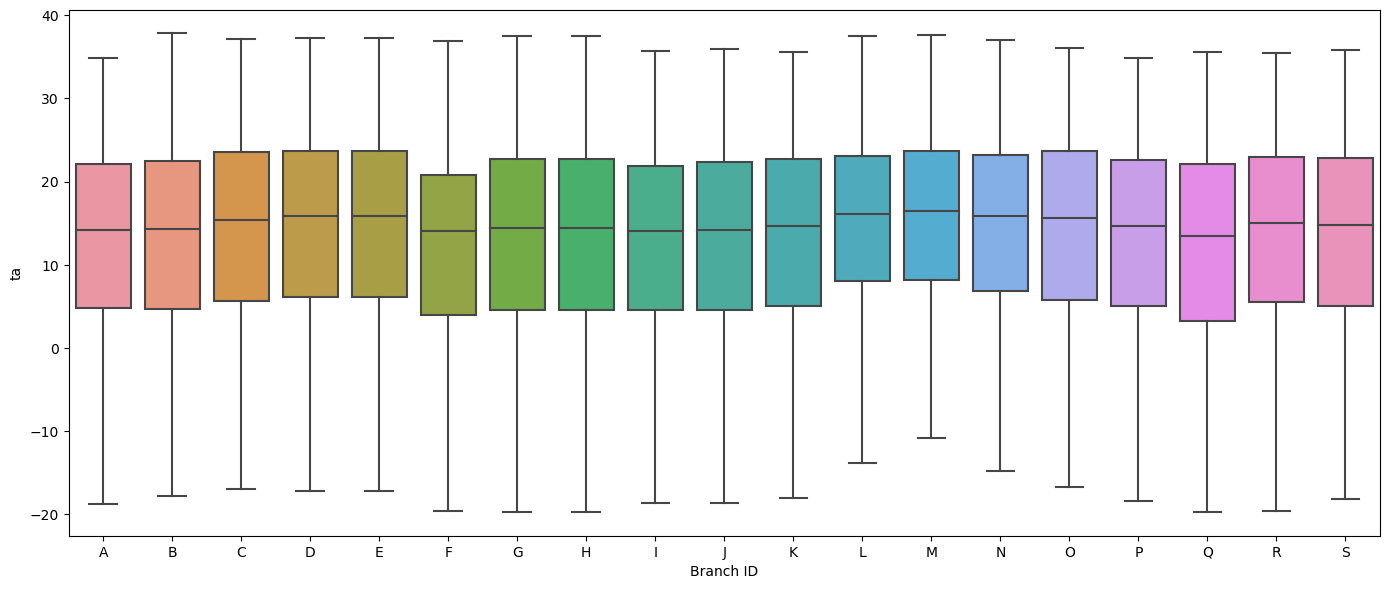

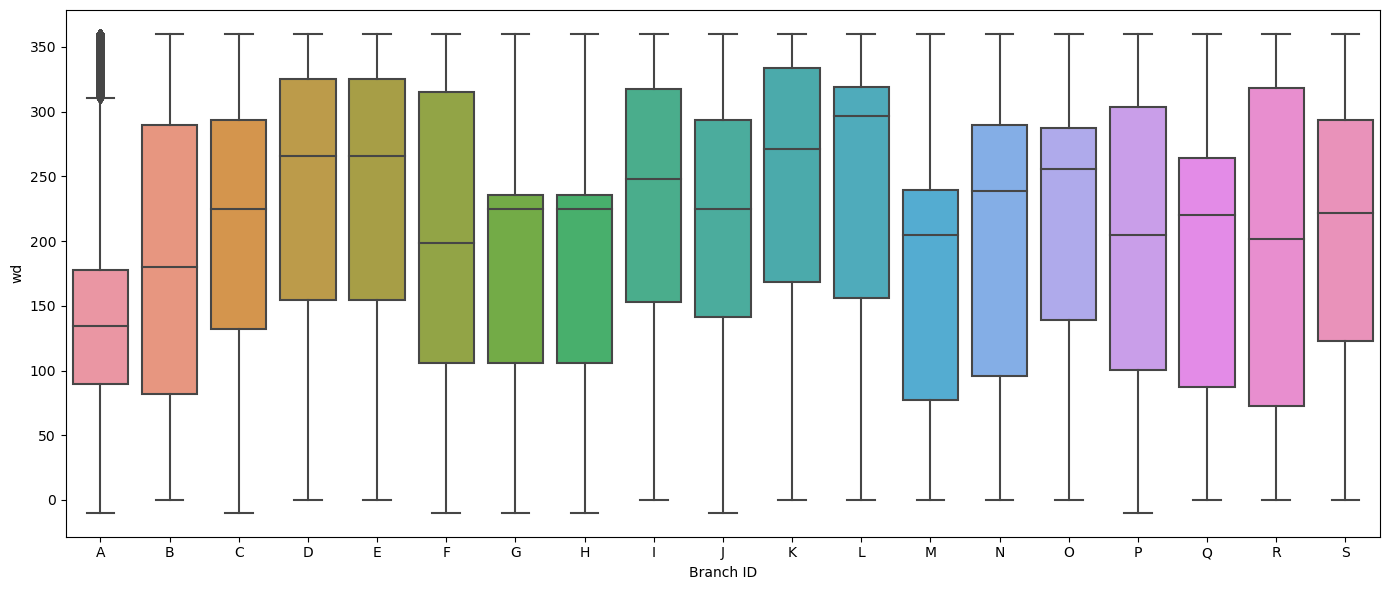

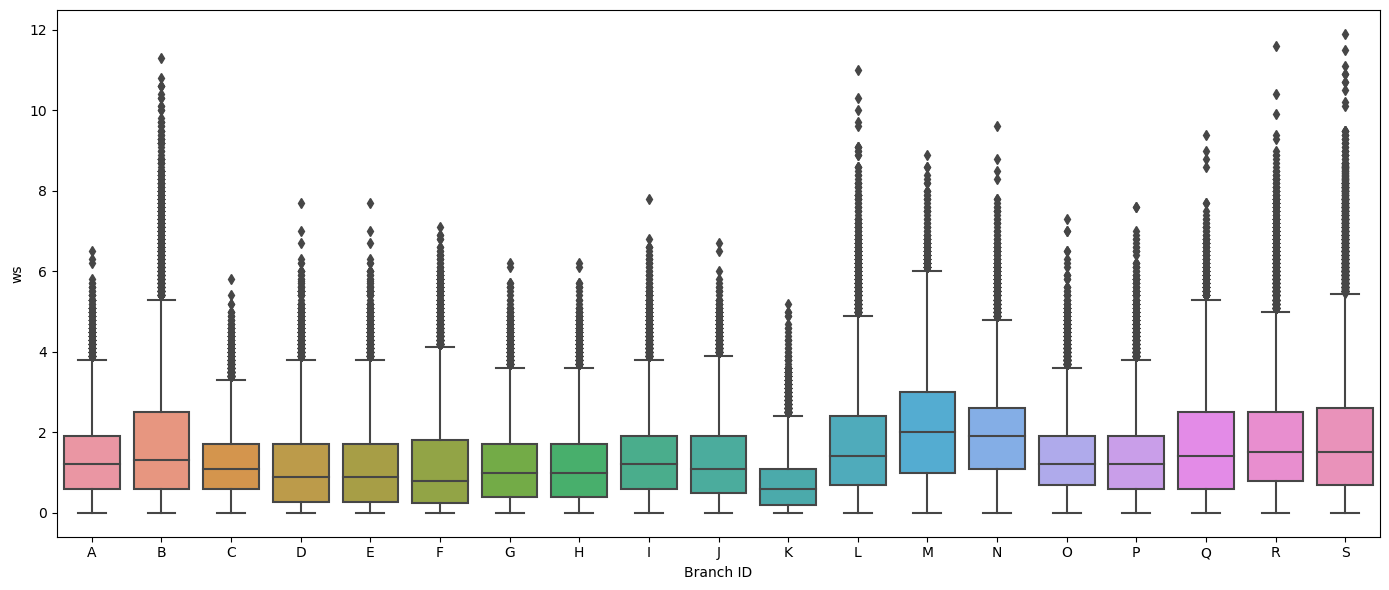

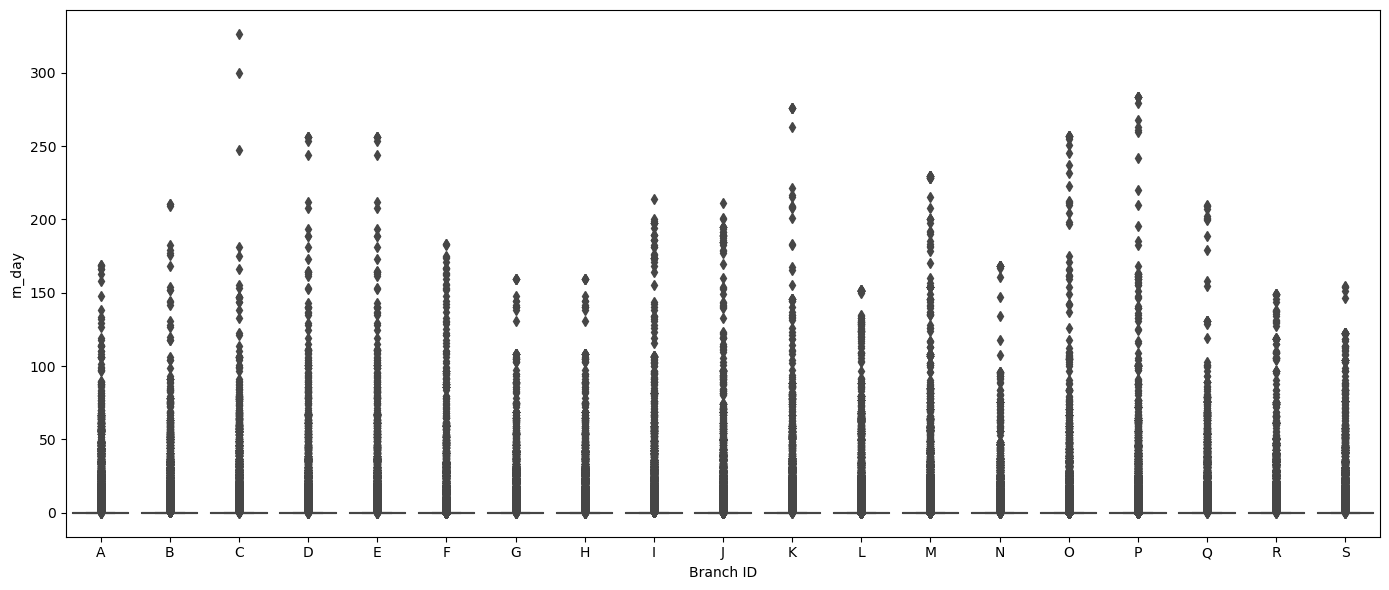

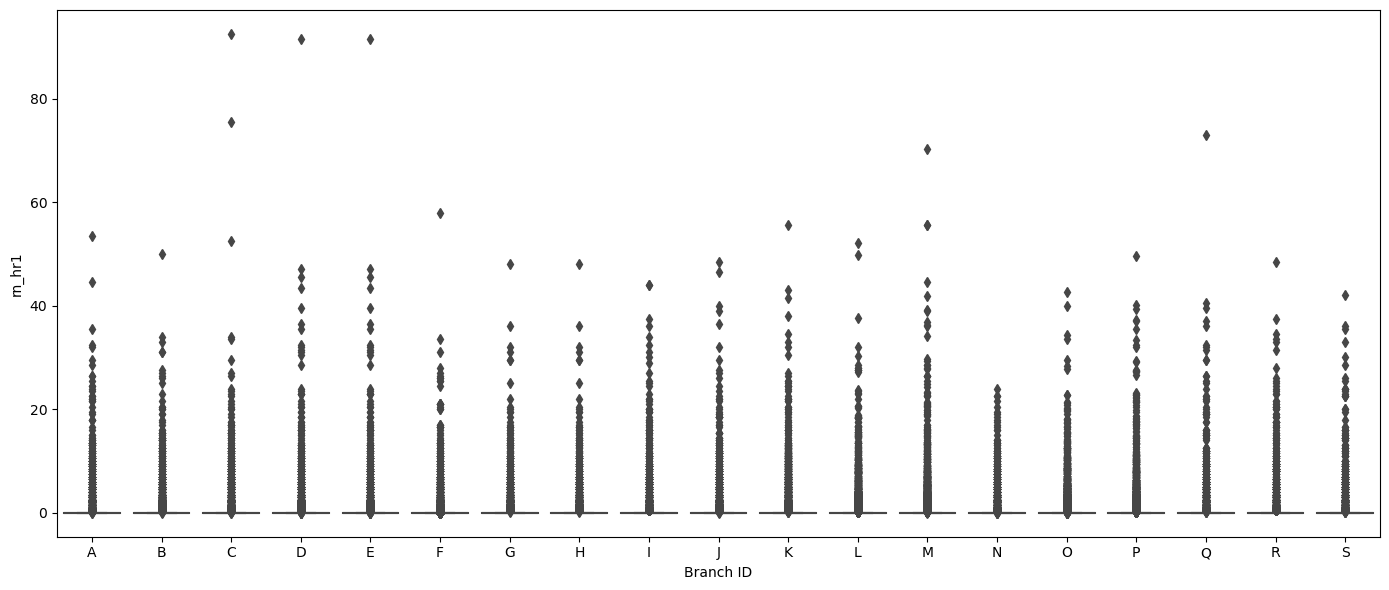

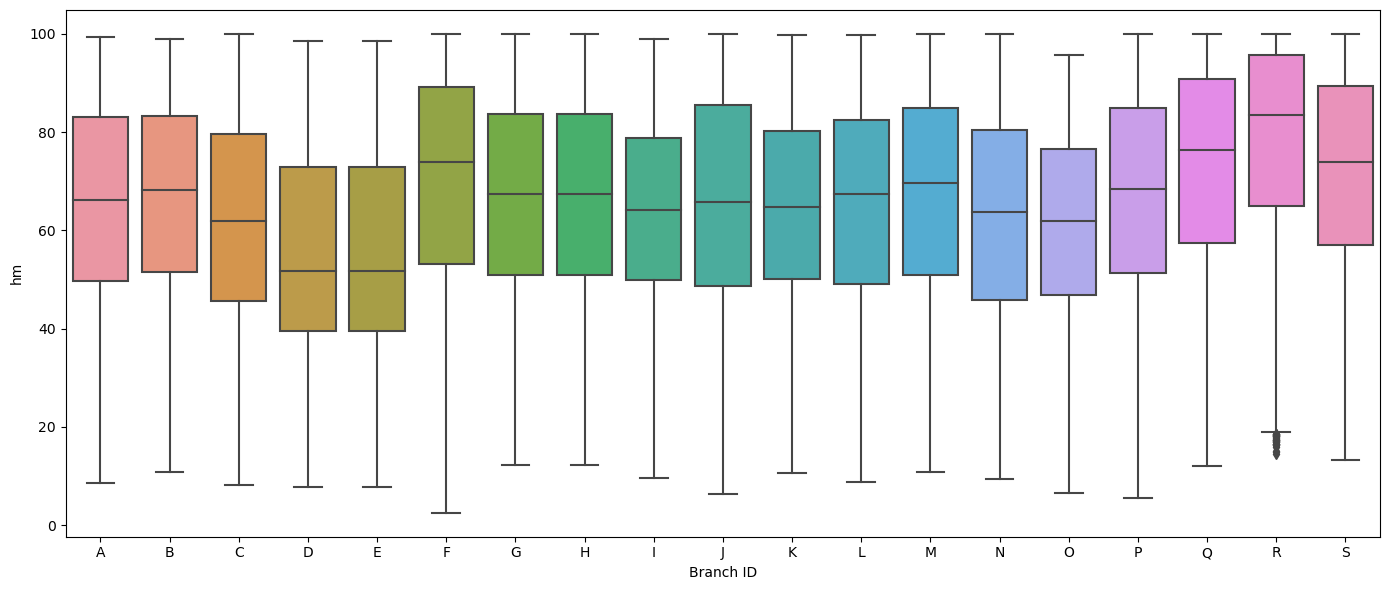

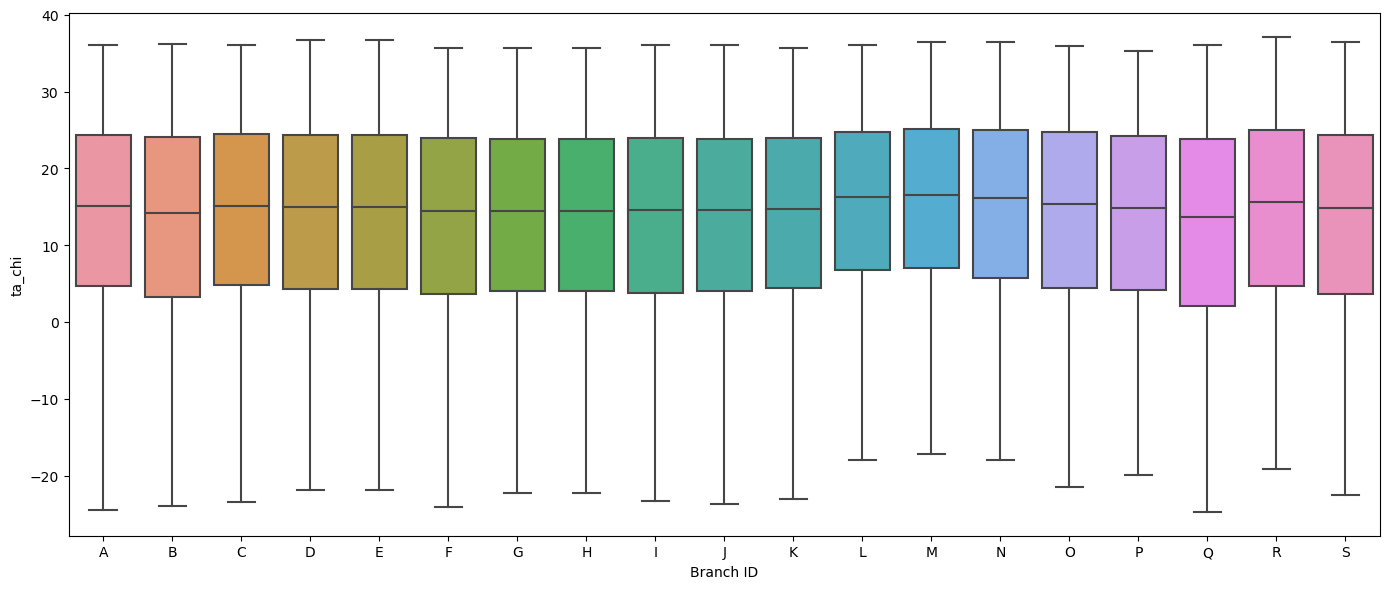

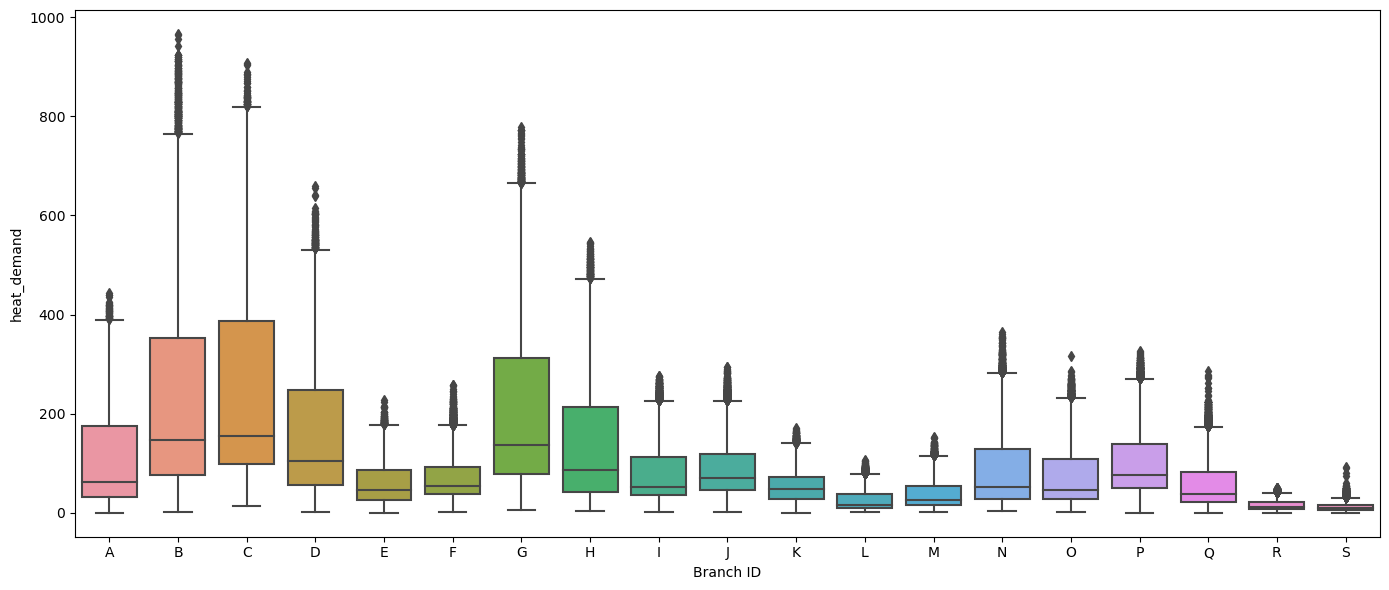

In [19]:
numeric_cols = df_interp.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_interp, x='branch_id', y=col)
    plt.xlabel("Branch ID")
    plt.ylabel(col)
    plt.xticks()
    plt.tight_layout()
    plt.show()

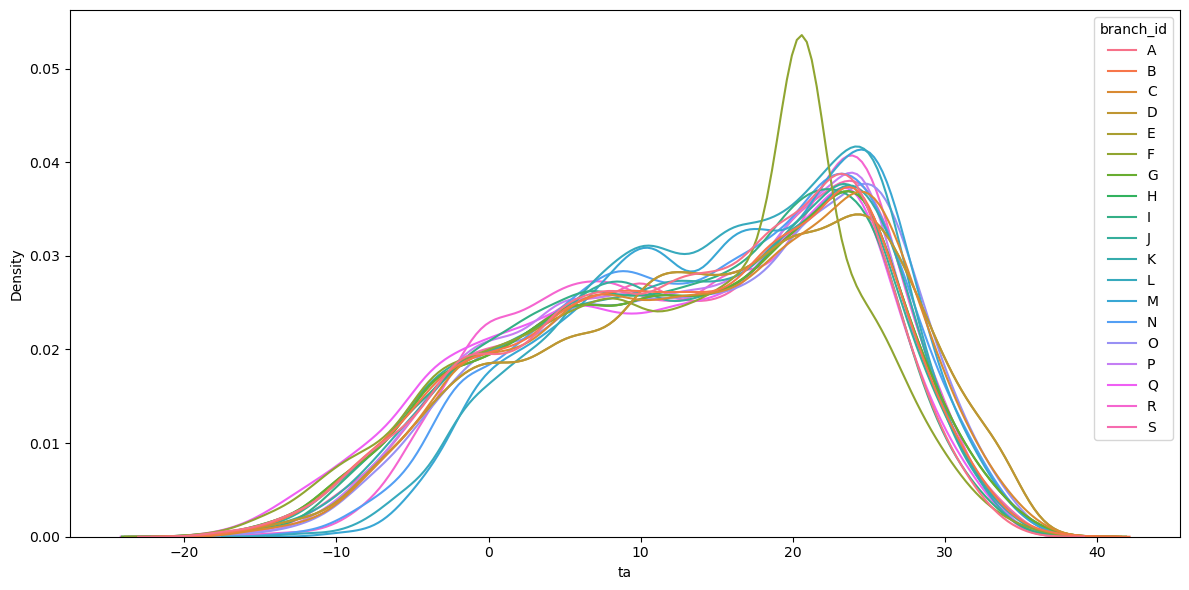

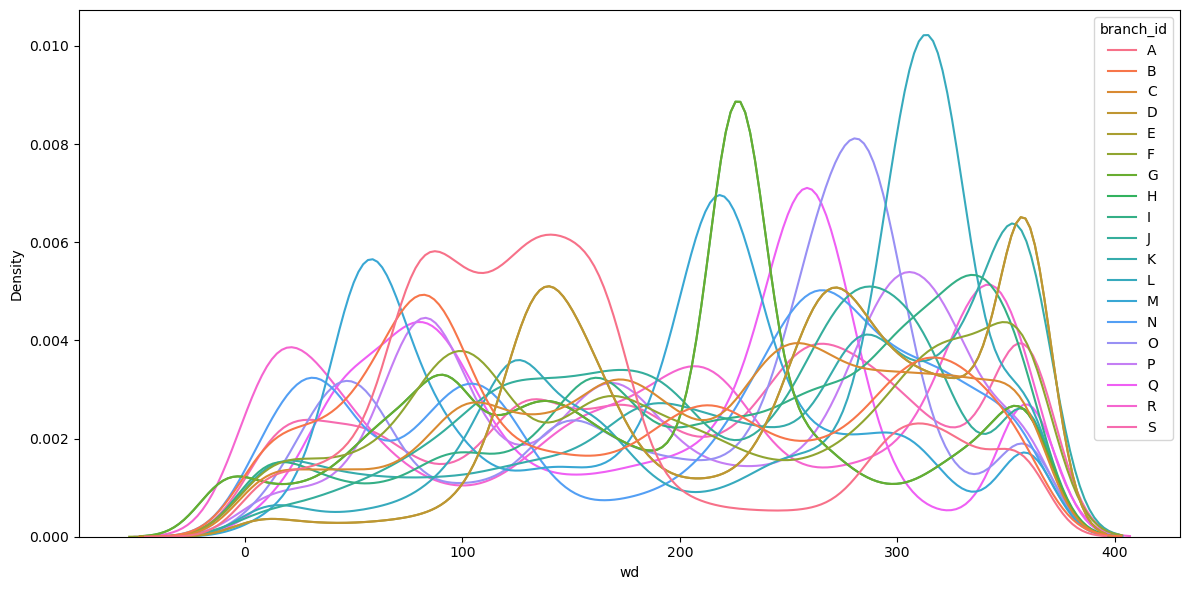

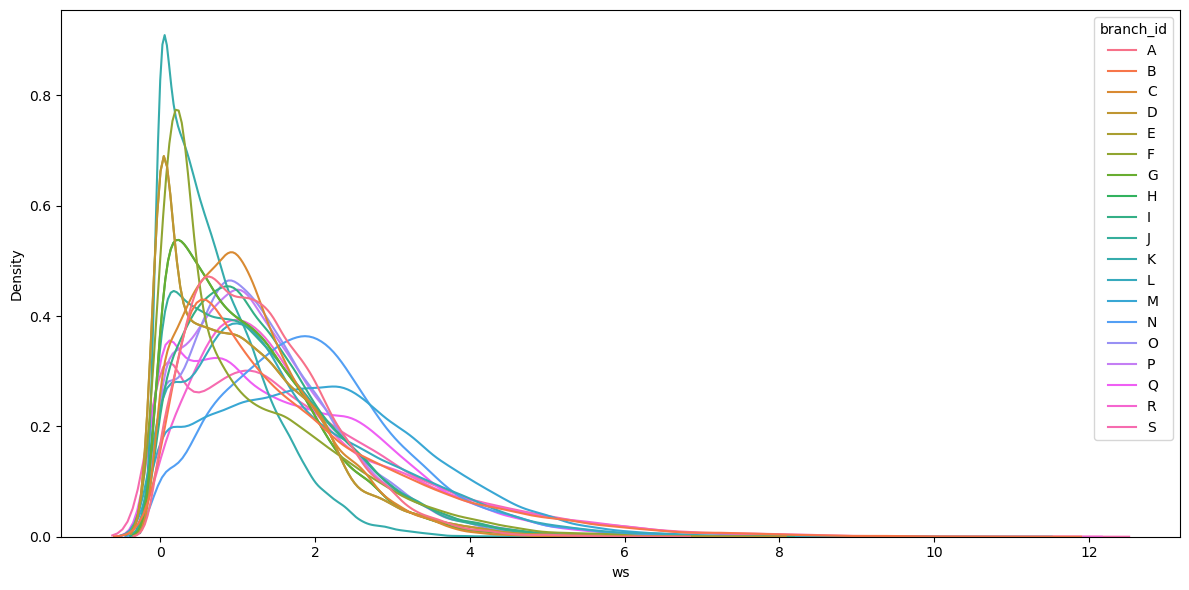

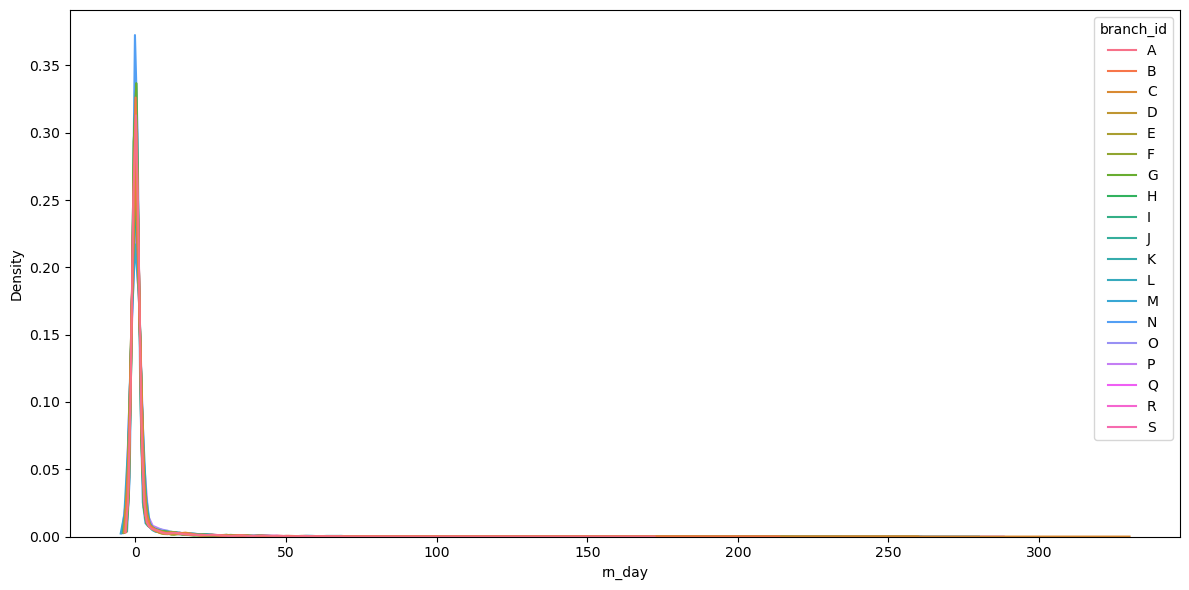

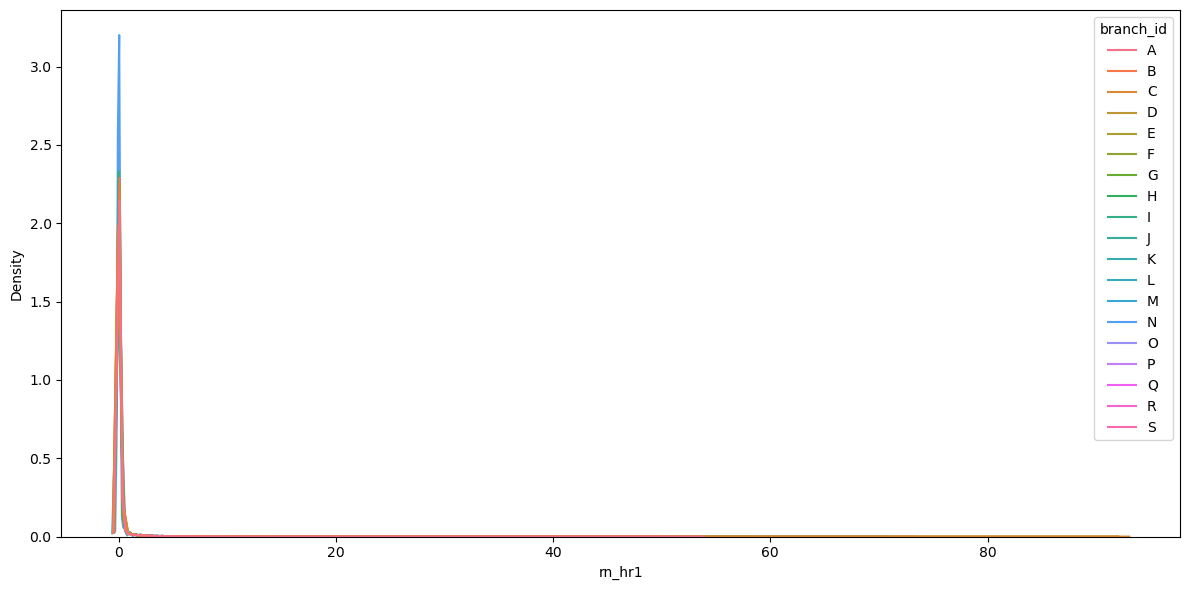

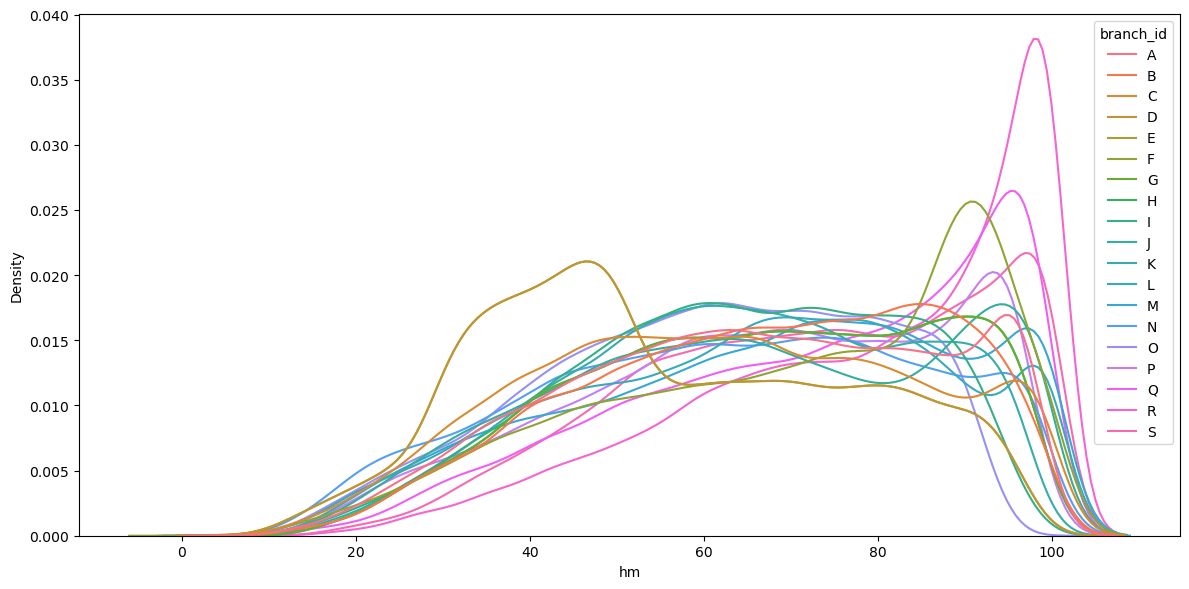

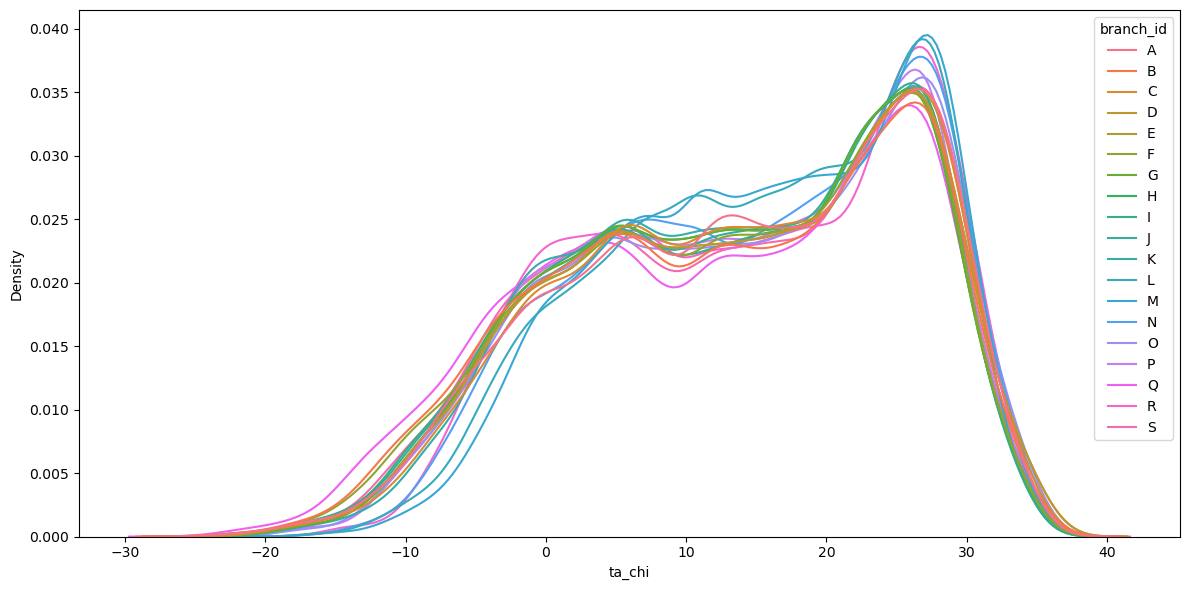

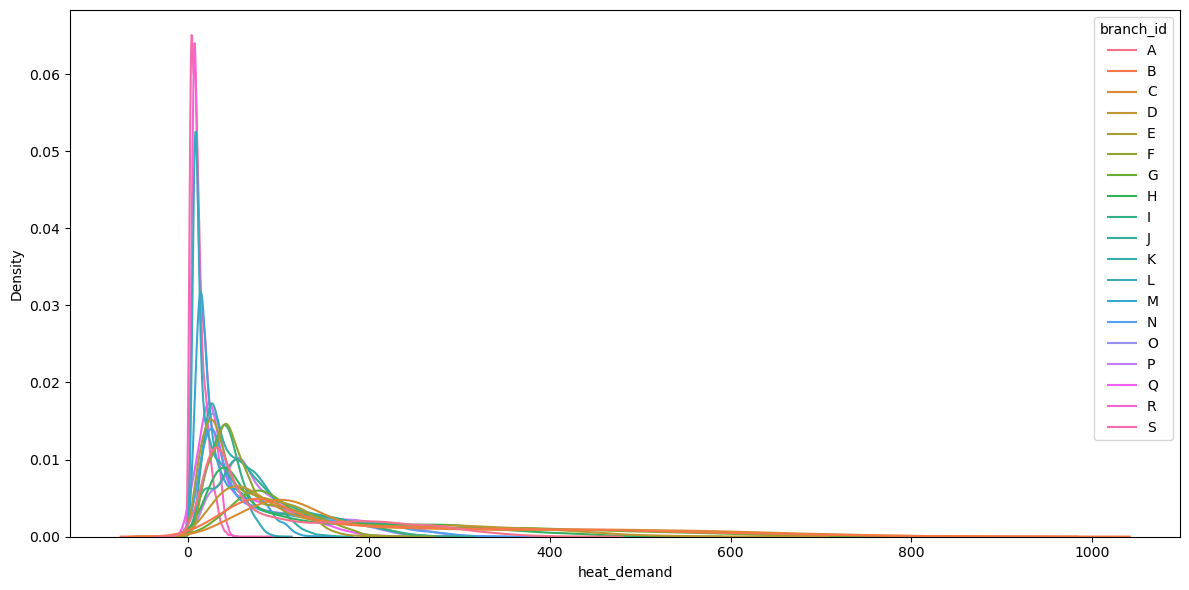

In [20]:
numeric_cols = df_interp.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df_interp, x=col, hue='branch_id', common_norm=False)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

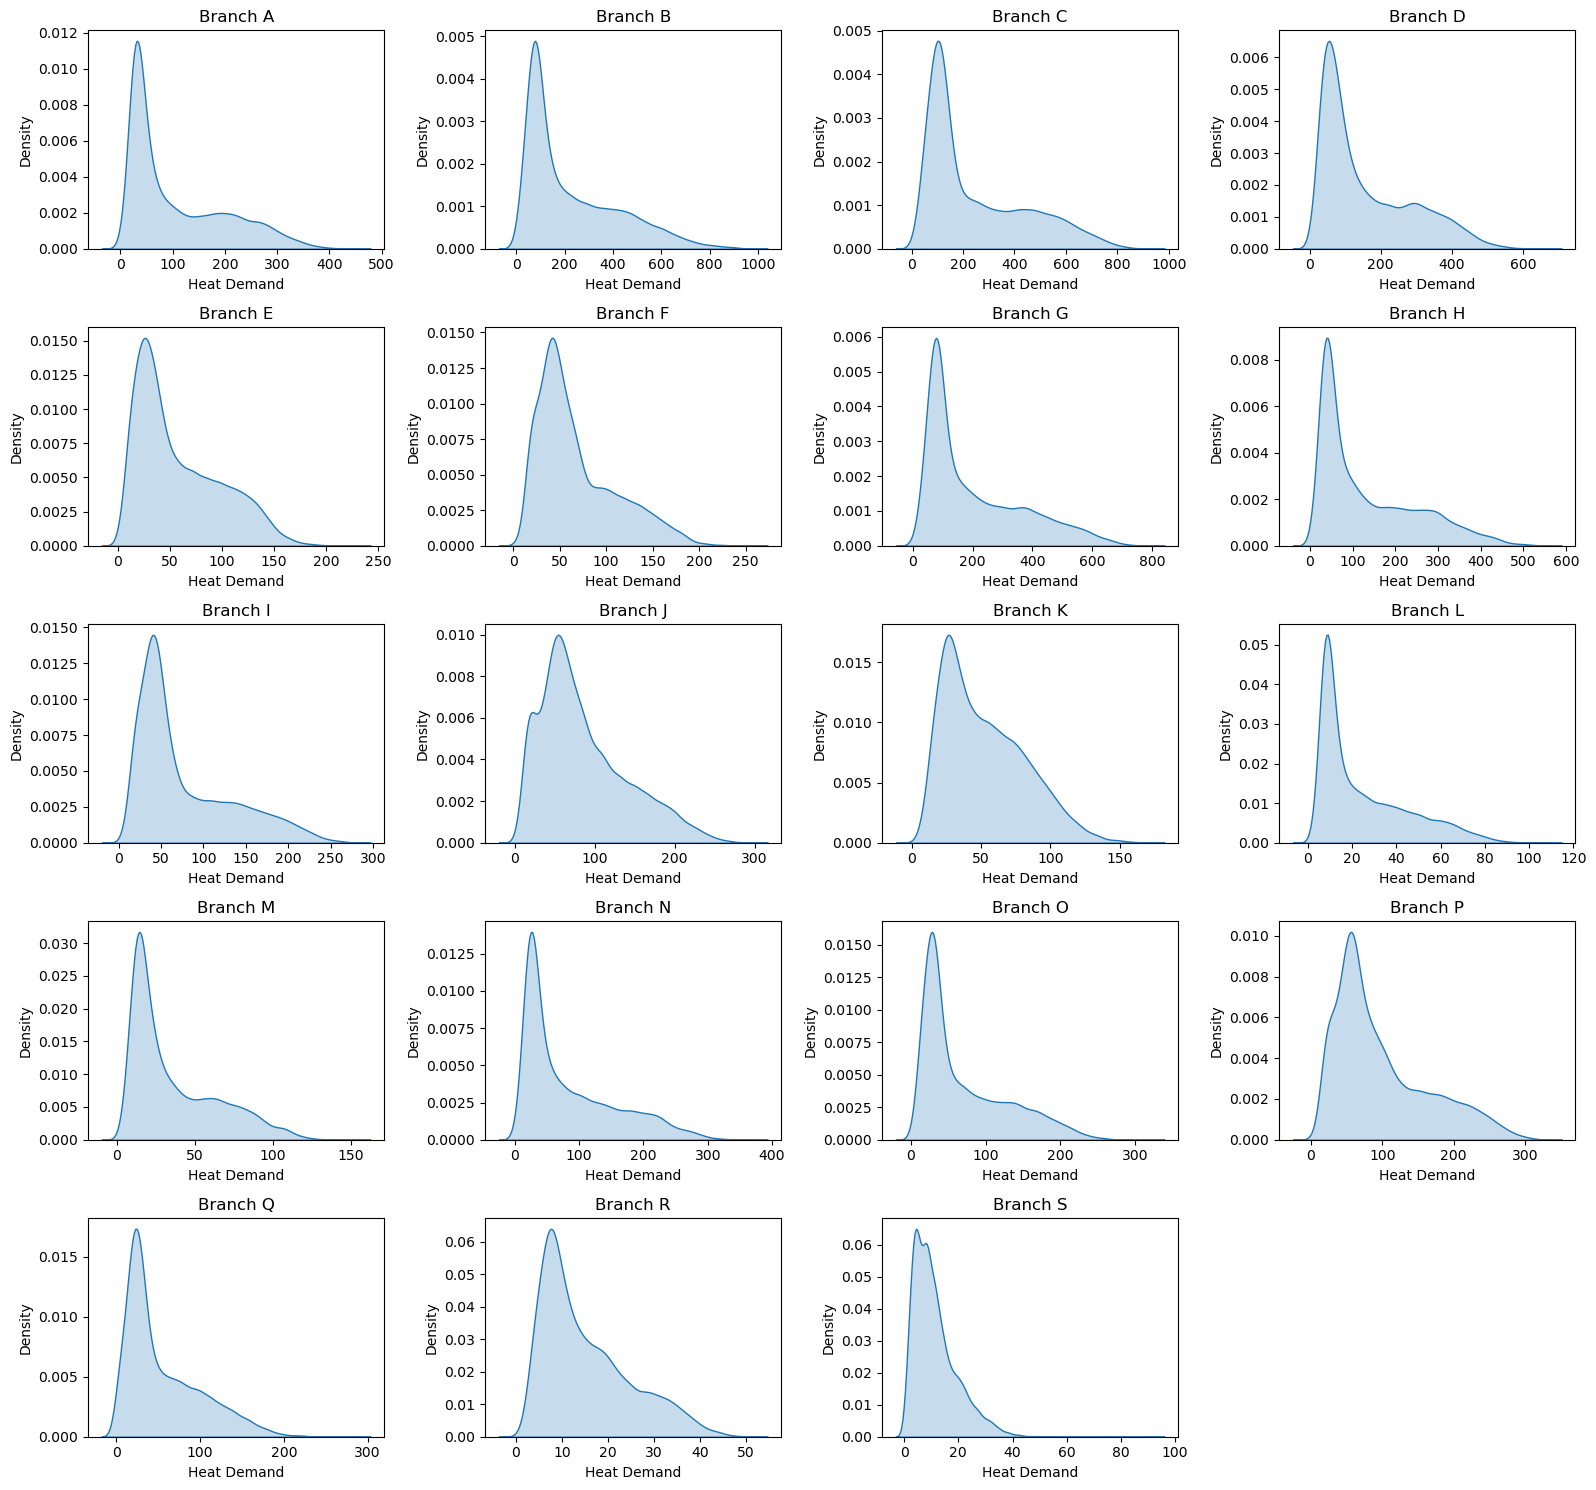

In [ ]:
branch_ids = sorted(df_interp_hmw['branch_id'].unique())
n_branches = len(branch_ids)

ncols = 4
nrows = (n_branches + ncols - 1) // ncols

plt.figure(figsize=(4 * ncols, 3 * nrows))

for i, branch in enumerate(branch_ids, 1):
    plt.subplot(nrows, ncols, i)
    sns.kdeplot(data=df_interp_hmw[df_interp_hmw['branch_id'] == branch], x='heat_demand', fill=True)
    plt.title(f'Branch {branch}')
    plt.xlabel('Heat Demand')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [22]:
# 로그 변환

df_interp_hmw['ws_log'] = np.log1p(df_interp_hmw['ws'])
df_interp_hmw['rn_day_log'] = np.log1p(df_interp_hmw['rn_day'])
df_interp_hmw['rn_hr1_log'] = np.log1p(df_interp_hmw['rn_hr1'])
df_interp_hmw['heat_demand_log'] = np.log1p(df_interp_hmw['heat_demand'])

In [ ]:
# 풍향 -> 각도 변환

radians = np.deg2rad(df_interp_hmw['wd'])  # 라디안 변환
df_interp_hmw['wd_sin'] = np.sin(radians)
df_interp_hmw['wd_cos'] = np.cos(radians)

In [24]:
df_interp_hmw

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        ta_chi  heat_demand  hour  month  weekday    ws_log  rn_day_log  \
0         -8.2        281.0     1      1        4  0.405465    0.000000   
1         -8.6        262.0     2      1        4  0.470004    0.000000   
2         -8.8        266.0     3      1        4  0.000000    0.000000   
3         -8.9        285.0     4      1        4  0.405465    0.000000   
4         -9.2        283.0     5      1        4  1.064711    0.000000   
...        ...          ...   ...    ...      ...       ...         ...   
499296     2.8         34.0    19     12        6  0.336472    1.252763   
499297     2.7         35.0    20     12        6  0.095310    1.252763   
499298     1.4         35.0    21     12        6  0.000000    1.252763   
499299     1.3         40.0    22     12        6  0.875469    1.252763   
499300     0.6         33.0    23     12        6  0.587787    1.252763   

        rn_hr1_log  heat_demand_log        wd_sin    wd_cos  
0              0.0         5.641907  9.792228e-01  0.202787  
1              0.0         5.572154  9.505157e-01  0.310676  
2              0.0         5.587249 -2.449294e-16  1.000000  
3              0.0         5.655992  4.083305e-01 -0.912834  
4              0.0         5.648974  9.626917e-01  0.270600  
...            ...              ...           ...       ...  
499296         0.0         3.555348 -8.038569e-01 -0.594823  
499297         0.0         3.583519 -7.360971e-01 -0.676876  
499298         0.0         3.583519 -2.449294e-16  1.000000  
499299         0.0         3.713572  5.000000e-01  0.866025  
499300         0.0         3.526361 -1.745241e-02  0.999848  

[499301 rows x 19 columns]

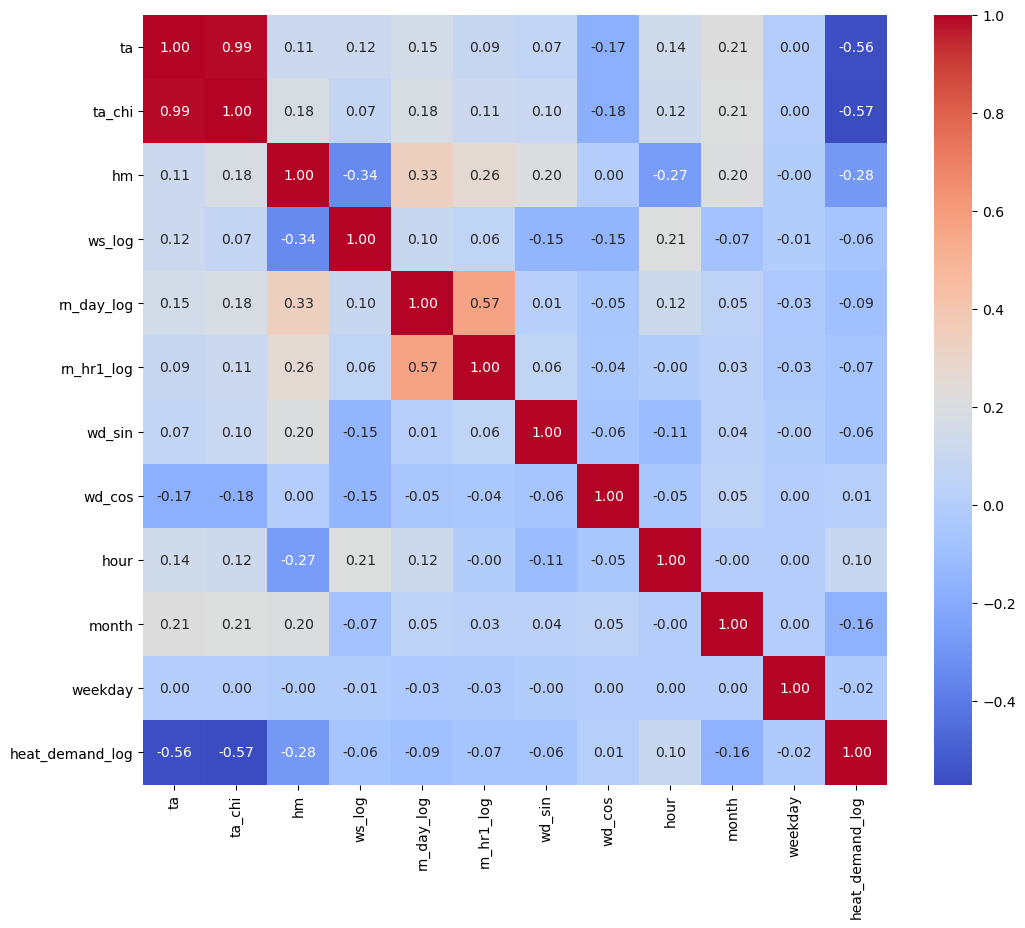

In [25]:
selected_cols = ['ta', 'ta_chi', 'hm', 
                 'ws_log', 'rn_day_log', 'rn_hr1_log',
                 'wd_sin', 'wd_cos',
                 'hour', 'month', 'weekday',
                 'heat_demand_log']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_interp_hmw[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [26]:
df_model = df_interp_hmw.dropna(subset=['hm'])
df_model

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499296 2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297 2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298 2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299 2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300 2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

        ta_chi  heat_demand  hour  month  weekday    ws_log  rn_day_log  \
0         -8.2        281.0     1      1        4  0.405465    0.000000   
1         -8.6        262.0     2      1        4  0.470004    0.000000   
2         -8.8        266.0     3      1        4  0.000000    0.000000   
3         -8.9        285.0     4      1        4  0.405465    0.000000   
4         -9.2        283.0     5      1        4  1.064711    0.000000   
...        ...          ...   ...    ...      ...       ...         ...   
499296     2.8         34.0    19     12        6  0.336472    1.252763   
499297     2.7         35.0    20     12        6  0.095310    1.252763   
499298     1.4         35.0    21     12        6  0.000000    1.252763   
499299     1.3         40.0    22     12        6  0.875469    1.252763   
499300     0.6         33.0    23     12        6  0.587787    1.252763   

        rn_hr1_log  heat_demand_log        wd_sin    wd_cos  
0              0.0         5.641907  9.792228e-01  0.202787  
1              0.0         5.572154  9.505157e-01  0.310676  
2              0.0         5.587249 -2.449294e-16  1.000000  
3              0.0         5.655992  4.083305e-01 -0.912834  
4              0.0         5.648974  9.626917e-01  0.270600  
...            ...              ...           ...       ...  
499296         0.0         3.555348 -8.038569e-01 -0.594823  
499297         0.0         3.583519 -7.360971e-01 -0.676876  
499298         0.0         3.583519 -2.449294e-16  1.000000  
499299         0.0         3.713572  5.000000e-01  0.866025  
499300         0.0         3.526361 -1.745241e-02  0.999848  

[476136 rows x 19 columns]

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1️⃣ 사용할 변수 정의
features = ['ta_chi', 'hm', 'ws_log', 'rn_day_log', 'rn_hr1_log',
            'wd_sin', 'wd_cos', 'hour', 'month']  # weekday 제외

X = df_model[features]
y = df_model['heat_demand_log']

# 2️⃣ train-test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ 예측 및 평가
y_pred = model.predict(X_test)

# 5️⃣ 로그 되돌리기 (원래 heat_demand)
y_test_true = np.expm1(y_test)
y_pred_true = np.expm1(y_pred)

# 6️⃣ 평가 지표
print("MAE:", mean_absolute_error(y_test_true, y_pred_true))
print("RMSE:", np.sqrt(mean_squared_error(y_test_true, y_pred_true)))
print("R²:", r2_score(y_test_true, y_pred_true))


MAE: 47.98416059353223
RMSE: 85.69243467353665
R²: 0.43453363077371654


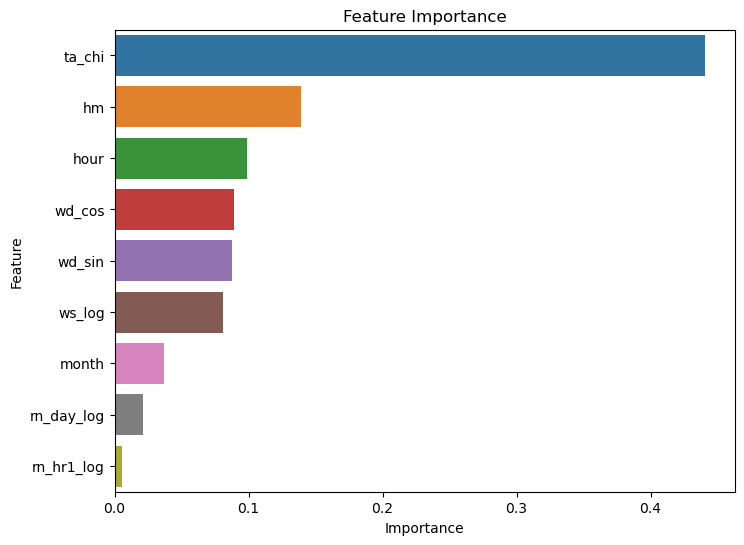

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [31]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, n_timesteps):
        self.X = []
        self.y = []
        for i in range(len(data) - n_timesteps):
            self.X.append(data[i:i+n_timesteps, :-1])  # 입력: 시계열 + 변수
            self.y.append(data[i+n_timesteps, -1])     # 출력: 다음 시점의 heat_demand_log

        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)


In [32]:
# 사용할 변수
features = ['ta_chi', 'hm', 'ws_log', 'rn_day_log', 'rn_hr1_log', 'wd_sin', 'wd_cos', 'hour', 'month']
target = 'heat_demand_log'

df_lstm = df_interp_hmw[features + [target]].dropna().reset_index(drop=True)

# 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_lstm)

# 슬라이딩 윈도우
n_timesteps = 24  # 과거 24시간
dataset = TimeSeriesDataset(data_scaled, n_timesteps)

# train/test 분할
train_size = int(len(dataset) * 0.8)
train_set = torch.utils.data.Subset(dataset, range(train_size))
test_set = torch.utils.data.Subset(dataset, range(train_size, len(dataset)))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


In [33]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # 마지막 시점만 사용
        return out.squeeze()


In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMModel(input_size=len(features)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {train_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.0087
Epoch 2/10, Loss: 0.0064
Epoch 3/10, Loss: 0.0056
Epoch 4/10, Loss: 0.0051
Epoch 5/10, Loss: 0.0047
Epoch 6/10, Loss: 0.0044
Epoch 7/10, Loss: 0.0041
Epoch 8/10, Loss: 0.0039
Epoch 9/10, Loss: 0.0037
Epoch 10/10, Loss: 0.0035


In [35]:
model.eval()
preds, targets = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        output = model(X_batch).cpu().numpy()
        preds.extend(output)
        targets.extend(y_batch.numpy())

# 역변환
heat_pred = np.expm1(preds)
heat_true = np.expm1(targets)

print("MAE:", mean_absolute_error(heat_true, heat_pred))
print("RMSE:", np.sqrt(mean_squared_error(heat_true, heat_pred)))
print("R²:", r2_score(heat_true, heat_pred))


MAE: 0.28821427
RMSE: 0.3520752
R²: -0.8146550125728078


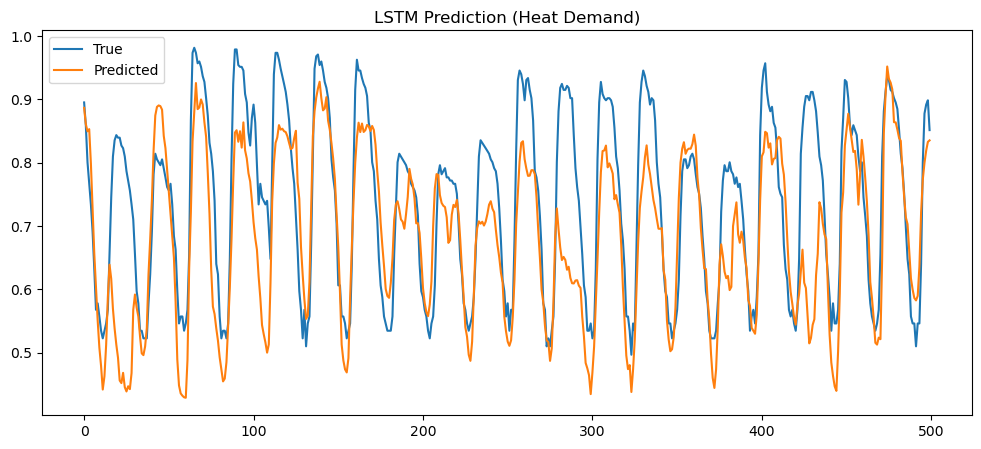

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(heat_true[:500], label='True')
plt.plot(heat_pred[:500], label='Predicted')
plt.legend()
plt.title("LSTM Prediction (Heat Demand)")
plt.show()


In [37]:
# 🧩 1. Dataset 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, data, n_timesteps):
        self.X = []
        self.y = []
        for i in range(len(data) - n_timesteps):
            self.X.append(data[i:i+n_timesteps, :-1])
            self.y.append(data[i+n_timesteps, -1])
        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# 🧩 2. LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out.squeeze()

# 🧩 3. 데이터 준비 (사용자 데이터프레임을 아래에 연결)
features = ['ta_chi', 'hm', 'ws_log', 'rn_day_log', 'rn_hr1_log', 'wd_sin', 'wd_cos', 'hour', 'month']
target = 'heat_demand_log'
df = df_interp_hmw[features + [target]].dropna().reset_index(drop=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# 시간 순 분할
n_timesteps = 24
train_len = int(len(data_scaled) * 0.7)
valid_len = int(len(data_scaled) * 0.15)

train_data = data_scaled[:train_len]
valid_data = data_scaled[train_len:train_len+valid_len]
test_data  = data_scaled[train_len+valid_len:]

train_set = TimeSeriesDataset(train_data, n_timesteps)
valid_set = TimeSeriesDataset(valid_data, n_timesteps)
test_set  = TimeSeriesDataset(test_data, n_timesteps)

train_loader = DataLoader(train_set, batch_size=64)
valid_loader = DataLoader(valid_set, batch_size=64)
test_loader  = DataLoader(test_set, batch_size=64)

In [ ]:
# 🧩 4. 모델 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=len(features)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

best_valid_loss = np.inf
early_stop_counter = 0

for epoch in range(30):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

    # validation
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for X_val, y_val in valid_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            val_pred = model(X_val)
            valid_loss += criterion(val_pred, y_val).item()
    valid_loss /= len(valid_loader)

    print(f"Epoch {epoch+1} | Valid Loss: {valid_loss:.4f}")
    
    # Early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= 5:
            print("Early stopping triggered.")
            break



Epoch 1 | Valid Loss: 0.0448
Epoch 2 | Valid Loss: 0.0140
Epoch 3 | Valid Loss: 0.0090
Epoch 4 | Valid Loss: 0.0096
Epoch 5 | Valid Loss: 0.0092


In [ ]:
# 🧩 5. 테스트 및 평가
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_pred_batch = model(X_batch).cpu().numpy()
        y_true.extend(y_batch.numpy())
        y_pred.extend(y_pred_batch)

# 역변환
y_true = np.expm1(y_true)
y_pred = np.expm1(y_pred)

print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R²:", r2_score(y_true, y_pred))

In [ ]:
# 🧩 6. 시각화
plt.figure(figsize=(12, 4))
plt.plot(y_true[:300], label='True')
plt.plot(y_pred[:300], label='Predicted')
plt.legend()
plt.title('LSTM Prediction Result')
plt.show()